In [21]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [23]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [24]:
from citipy import citipy

In [25]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [26]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [27]:
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"
print("Yes")

Yes


In [28]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [29]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_temp = city_weather["main"]["temp"]
        city_min_temp = city_weather["main"]["temp_min"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        weather_main = city_weather["weather"][0]["main"]
        weather_description = city_weather["weather"][0]["description"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Temp": city_temp,
                          "Min Temp": city_min_temp,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Current Description": weather_main,
                          "Current Details": weather_description,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Processing Record 1 of Set 1 | ushuaia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | punta arenas
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | kodiak
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | dikson
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | mataura
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | leningradskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | puerto ayora
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 1 | abu kamal
-----------------------------
Data Retriev

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 2 | fortuna
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 2 | uruzgan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 2 | kudahuvadhoo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 2 | vaini
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 2 | chokurdakh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 2 | batemans bay
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 2 | solovetskiy
City not found. Skipping...
-----------------------------
Data Retrieval Co

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 3 | provideniya
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 3 | codrington
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 3 | the valley
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 3 | xiangdong
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 3 | cidreira
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 3 | northam
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 3 | bargal
City not found. Skipping...
----------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 4 | kaeo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 4 | attawapiskat
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 4 | berlevag
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 4 | kenai
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 4 | amderma
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 4 | bella union
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 4 | victoria
----------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 5 | iroquois falls
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 5 | sibu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 5 | lasa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 6 | atar
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 6 | lavrentiya
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 6 | la romana
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 6 | griffith
-----------------------------
Data Retrieval Complete      
-----------------------------


-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 7 | basco
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 7 | upernavik
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 7 | fortuna foothills
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 7 | grindavik
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 7 | constitucion
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 7 | halalo
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 7 | laives
-----------------------------
Data Retrieval Co

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 8 | magalia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 23 of Set 8 | asosa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 8 | qandala
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 8 | cabo san lucas
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 8 | clyde river
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 8 | severo-kurilsk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 8 | oranjemund
-----------------------------
Data Retrieval Complete      
-----------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 34 of Set 9 | bonthe
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 35 of Set 9 | olga
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 9 | langsa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 9 | doctor pedro p. pena
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 9 | sabaudia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 9 | laguna
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 9 | uyemskiy
-----------------------------
Data Retrieval Complete

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 45 of Set 10 | marinette
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 46 of Set 10 | chumikan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 10 | harper
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 10 | bol
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 10 | istok
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 10 | san cristobal
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 11 | eastlake
-----------------------------
Data Retrieval Complete      
---------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 12 | simplicio mendes
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 12 | lexington
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 12 | balotra
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 12 | rocafuerte
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 12 | porto walter
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 12 | lorengau
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 12 | luzhou
-----------------------------
Data Retrieval Complete      
-------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 13 | inyonga
-----------------------------
Data Retrieval Complete      
-----------------------------


In [30]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Temp,Min Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description,Current Details,Country,Date
0,Ushuaia,-54.8000,-68.3000,26.26,26.26,26.26,86,0,2.30,Clear,clear sky,AR,2022-07-15 04:25:07
1,Punta Arenas,-53.1500,-70.9167,26.71,26.71,26.71,100,40,5.75,Fog,fog,CL,2022-07-15 04:25:08
2,Kodiak,57.7900,-152.4072,62.11,62.11,62.11,77,100,0.00,Clouds,overcast clouds,US,2022-07-15 04:20:32
3,Dikson,73.5069,80.5464,43.52,43.52,43.52,76,26,11.97,Clouds,scattered clouds,RU,2022-07-15 04:25:08
4,Mataura,-46.1927,168.8643,45.48,45.48,45.48,97,100,4.23,Clouds,overcast clouds,NZ,2022-07-15 04:25:09
5,Leningradskiy,69.3833,178.4167,36.54,36.54,36.54,76,47,7.58,Clouds,scattered clouds,RU,2022-07-15 04:25:09
6,Puerto Ayora,-0.7393,-90.3518,68.56,68.56,68.56,96,57,7.00,Clouds,broken clouds,EC,2022-07-15 04:24:28
7,Abu Kamal,34.4506,40.9171,85.17,85.17,85.17,31,0,16.69,Clear,clear sky,SY,2022-07-15 04:25:10
8,Marsh Harbour,26.5412,-77.0636,82.44,82.44,82.44,73,33,16.02,Clouds,scattered clouds,BS,2022-07-15 04:22:35
9,Busselton,-33.6500,115.3333,63.18,63.18,63.18,66,53,12.12,Clouds,broken clouds,AU,2022-07-15 04:25:10


In [31]:
updated_column_order = ["City","Country","Date","Lat","Lng","Temp","Min Temp","Max Temp","Current Description", "Current Details", "Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[updated_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Temp,Min Temp,Max Temp,Current Description,Current Details,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-07-15 04:25:07,-54.8000,-68.3000,26.26,26.26,26.26,Clear,clear sky,86,0,2.30
1,Punta Arenas,CL,2022-07-15 04:25:08,-53.1500,-70.9167,26.71,26.71,26.71,Fog,fog,100,40,5.75
2,Kodiak,US,2022-07-15 04:20:32,57.7900,-152.4072,62.11,62.11,62.11,Clouds,overcast clouds,77,100,0.00
3,Dikson,RU,2022-07-15 04:25:08,73.5069,80.5464,43.52,43.52,43.52,Clouds,scattered clouds,76,26,11.97
4,Mataura,NZ,2022-07-15 04:25:09,-46.1927,168.8643,45.48,45.48,45.48,Clouds,overcast clouds,97,100,4.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,Jacksonville Beach,US,2022-07-15 04:29:06,30.2947,-81.3931,75.42,73.08,77.05,Clouds,overcast clouds,94,100,8.05
556,Sao Lourenco Do Oeste,BR,2022-07-15 04:29:06,-26.3592,-52.8511,63.10,63.10,63.10,Clouds,overcast clouds,63,96,10.02
557,Margate,GB,2022-07-15 04:29:07,51.3813,1.3862,54.43,51.12,56.30,Clouds,broken clouds,87,83,4.70
558,Kyzyl-Suu,KG,2022-07-15 04:29:07,42.3414,78.0056,65.86,65.86,65.86,Clouds,overcast clouds,44,100,4.88


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [34]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1657861118.5984058

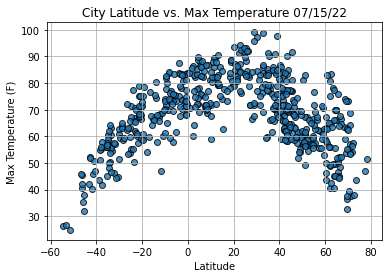

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

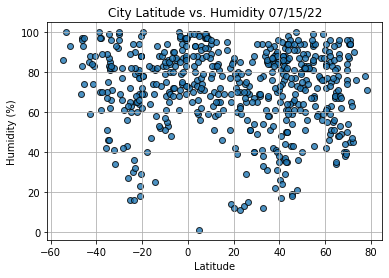

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

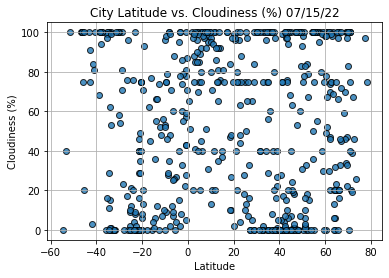

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

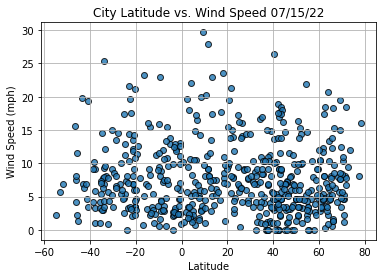

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()